 # <center> Análise Exploratória dos Dados da Tabela Subscriptions <center> # 



<img src='imagem1.jpg' style="width: 500px;">

 #### Perguntas a serem respondidas: ####
 * Quais planos recebem mais migrações e de quais planos vieram essas migrações? 
 * (Vamos adicionar mais perguntas depois)

### 1º - Quais planos recebem mais migrações e de quais planos vieram essas migrações? ###


In [1]:
# bibliotecas nescessárias
library(ggplot2)
library(repr)
library(circlize)
library(plyr)

In [2]:
# vamos fazer o upload do tabela que contem informações sobre assinaturas
# que fizeram upgrad e seus respectivos planos
migracao <- read.csv(file="tabela_migracao.csv",head=TRUE,sep=",")

# removendo uma coluna indesejada 
migracao <- migracao[, -1]

In [3]:
# vamos pegar os novos planos obtidos com o upgrade da assinatura.
# Não queremos aqueles upgrades que sejam iguais ao plano antigo. 
planos <- migracao['plano_novo'][migracao['plano_novo'] != migracao['plano_antigo']]

In [4]:
# Vamos tabular esses dados de modo a informar 
# a frequência de cada plano que recebeu a migração
planos <- table(planos)

# transformamos isso em um dataframe
planos_df <- as.data.frame(planos)

# Queremos só aqueles cuja frequêcnia seja maior que 15
planos_df2 <- planos_df[planos_df[, 'Freq'] >= 15, ]

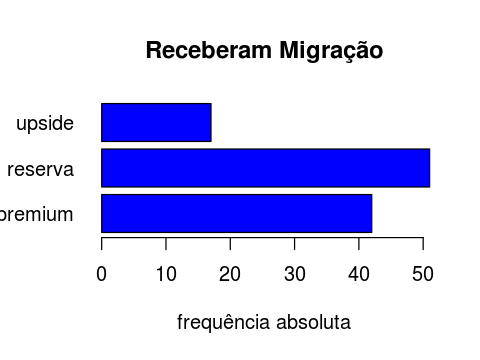

In [5]:
# Por fim, vamos plotar um gráfico de barras para ver a frequência 
# absoluta de migrações recebidas por cada um desses planos

# configurando tamanho do plot
options(repr.plot.width=4, repr.plot.height=3)

nomes_plano <- c('premium', 'reserva', 'upside')

barplot(planos_df2$Freq, names.arg = nomes_plano, xlab = 'frequência absoluta',
        main = 'Receberam Migração', horiz=TRUE, las=1,
       col='blue')

Os planos **upside-essencial-desconto(315)**, **reserva-empiricus-mensal-recorrente(236)** e **premium-pass(197)** são os que mais receberam migrações. Vamos rastrear as origens dessas migrações e a intensidade de cada fluxo migratório usando um Diagrama de Cordas.

In [6]:
relacao <- data.frame("from" = migracao$plano_antigo, 
                        "to" = migracao$plano_novo)

# Não queremos aqueles upgrades que sejam iguais ao plano antigo.
relacao <- relacao[ relacao[,'to'] != relacao['from'],]

In [7]:
# criar um novo dataframe que contenha
# apenas linhas distintas e a frequência dessas
# linhas informadas numa terceira coluna 'nrow'
relacao <- ddply(relacao, .(from, to), c("nrow"))

# queremos apenas aquelas linhas que contenha
# os três planos que receberam maior migração
# conforme gráfico de barras acima
relacao <- relacao[
                  relacao[, 'to'] == 315 |
                  relacao[, 'to'] == 236 |
                  relacao[, 'to'] == 197,]

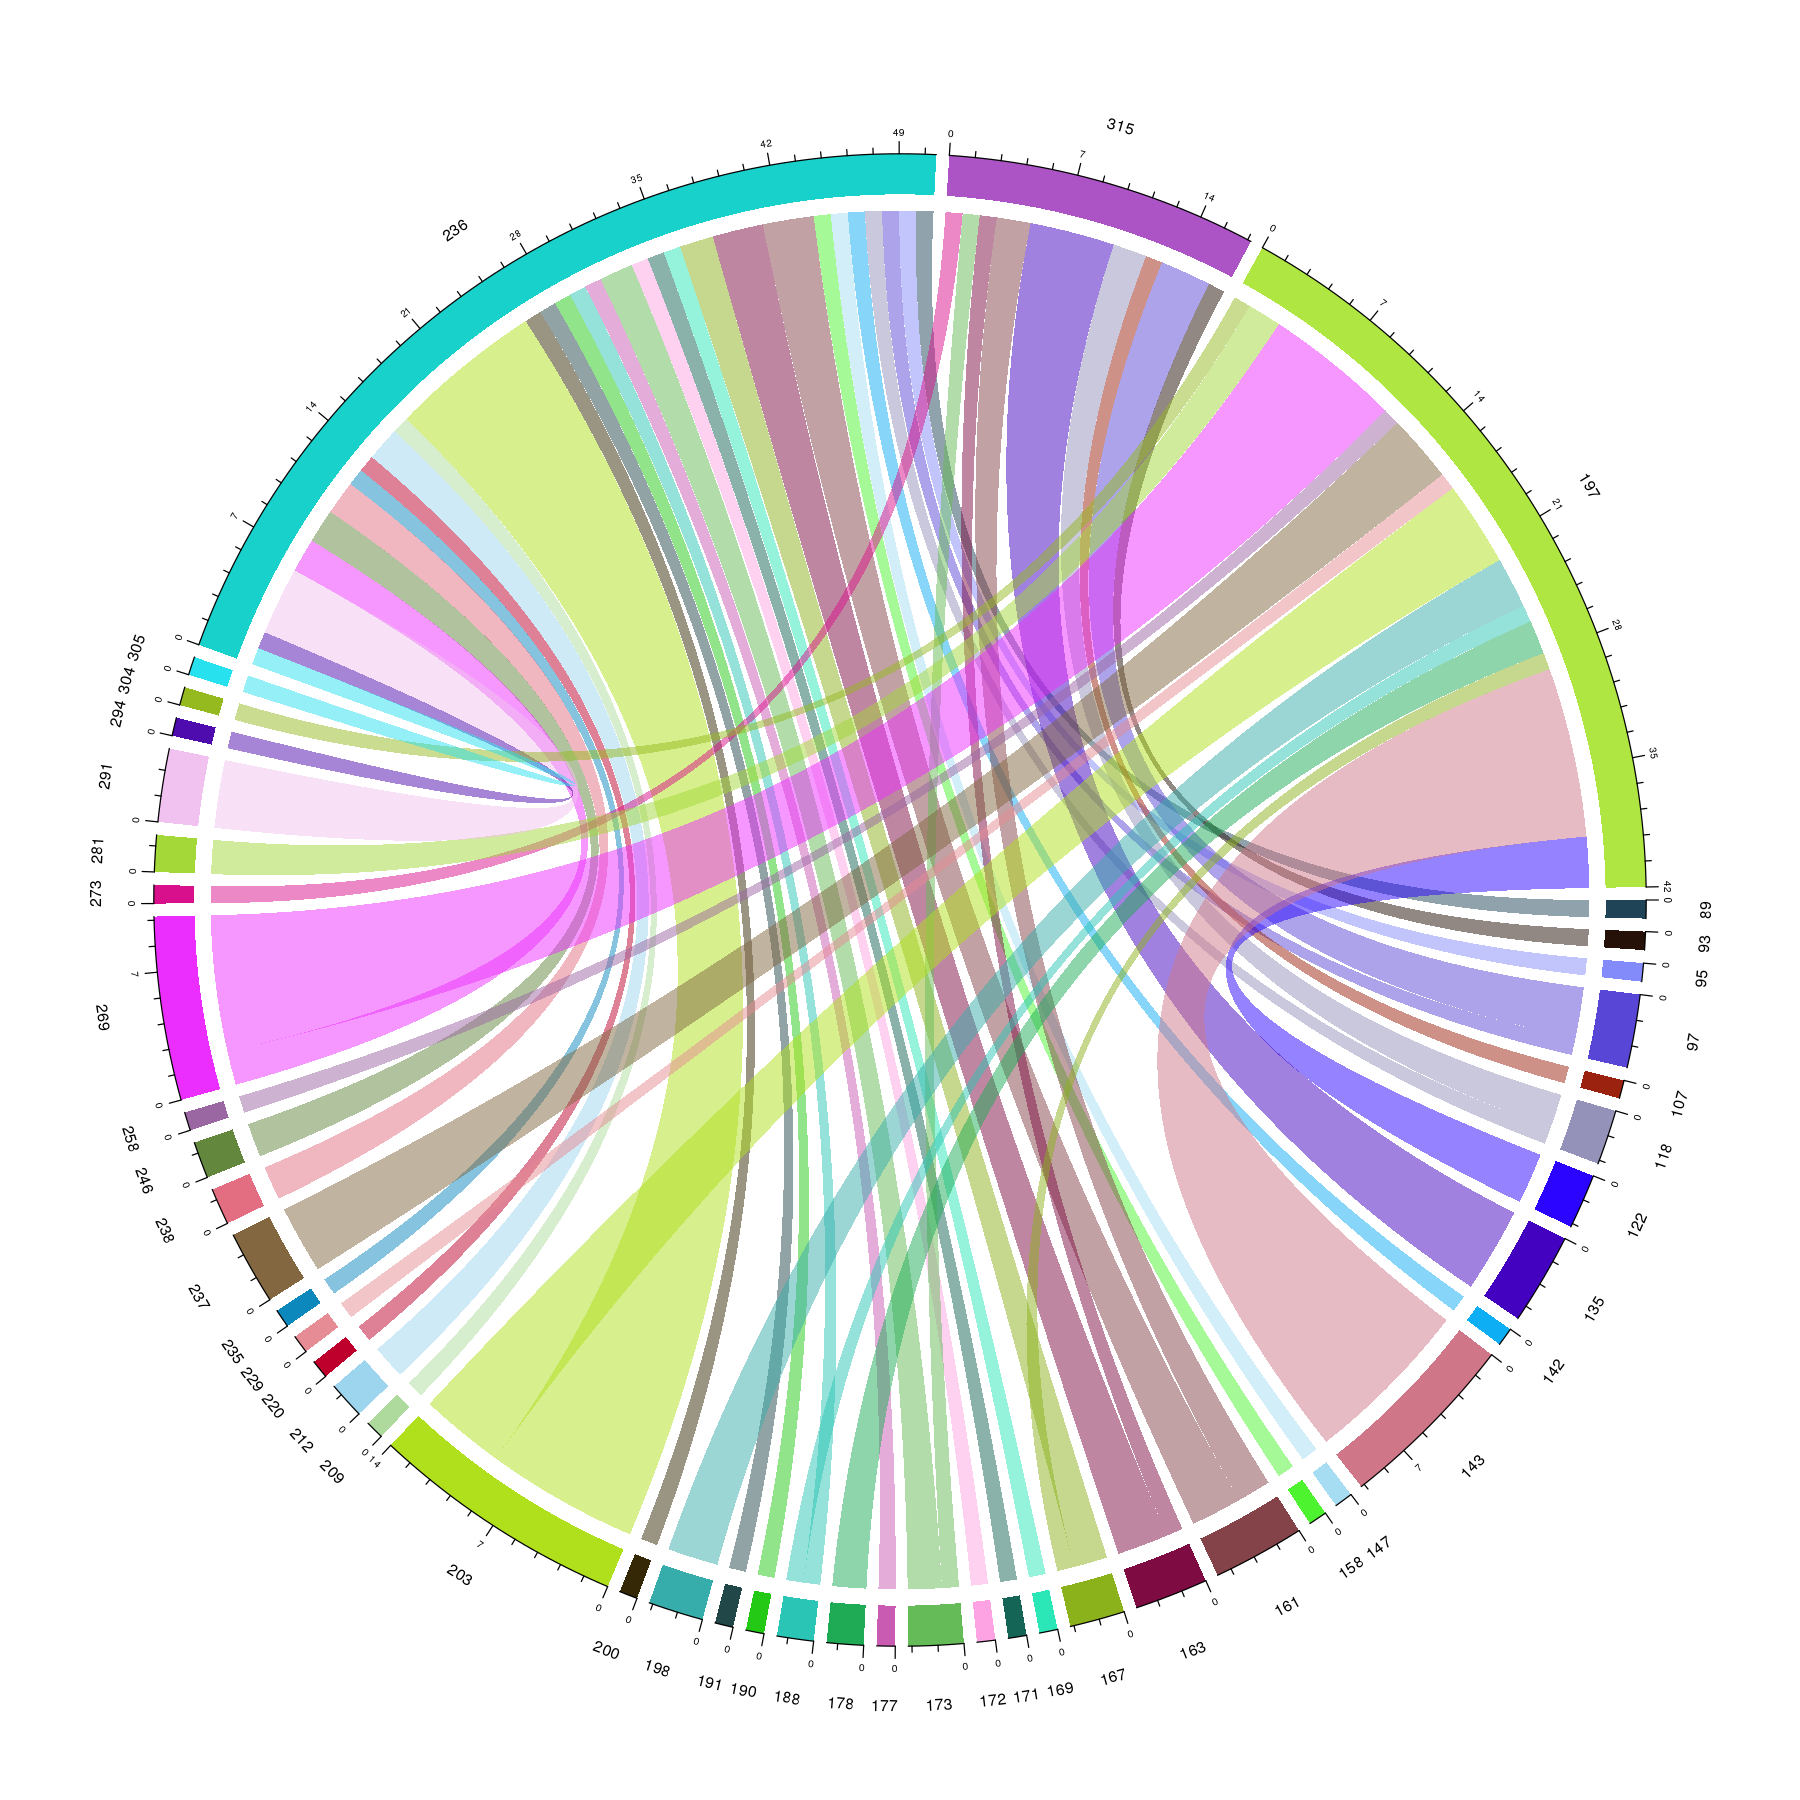

In [8]:
# configurando tamanho do plot
options(repr.plot.width=15, repr.plot.height=15)

# por fim o diagramas de cordas
chordDiagram(relacao)

 Notamos que a maior parte das migrações recebidas pelo plano *reserva-empiricus-mensal-recorrente(236)* advem do plano *empiricus-renda-fixa(203)*. Já o plano upside-essencial-desconto(315) recebe boa parte de suas migrações vindas do plano *vacas-leiteiras-desconto-aniversario(135)*. O plano *premium-pass(197)* recebeu a maioria das migrações vindas dos planos *microcap-alert(143)* e *empiricus-renda-fixa-aniversario-7-anos(269)*.